# Imports

In [34]:
%load_ext autoreload
%autoreload 2
from display_image import ImageDisplay

import os
import sys
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Dataset

In [29]:
# Loading training dataset
df_train = pd.read_csv(f'data{os.sep}mnist_train.csv')
print(df_train.shape)

(60000, 785)


In [3]:
# Loading test dataset
df_test = pd.read_csv(f'data{os.sep}mnist_test.csv')
print(df_train.shape)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [4]:
train_labels = df_train.iloc[:, 0].values
train_images = df_train.iloc[:, 1:].values
train_images = train_images.reshape((train_images.shape[0], 784))

test_labels = df_test.iloc[:, 0].values
test_images = df_test.iloc[:, 1:].values
test_images = test_images.reshape((test_images.shape[0], 784))

df_train_images = pd.DataFrame({
    "label": train_labels,
    "image": np.array(train_images).tolist()
    })


df_test_images = pd.DataFrame({
    "label": test_labels,
    "image": np.array(test_images).tolist()
    })

print(df_train_images.shape)
print(df_test_images.shape)

       label                                              image
0          5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1          0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2          4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3          1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4          9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
...      ...                                                ...
59995      8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59996      3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59997      5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59998      6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59999      8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[60000 rows x 2 columns]
      label                                              image
0         7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1         2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2         1  [0, 

# Data visualization

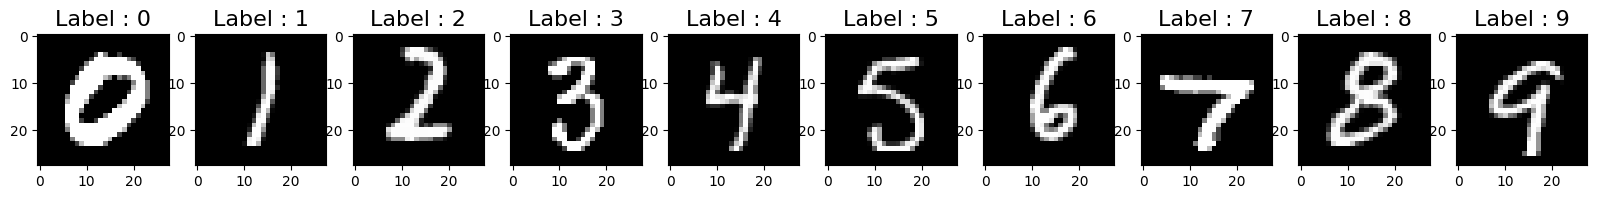

In [76]:
#Visualize examples
fig, ax = plt.subplots(1, 10, figsize=(20,20))

for i in range(10) :
    sample = df_train_images.loc[df_train_images["label"] == i]
    disp = ImageDisplay(sample)
    disp.display_image(ax[i], random.randint(0, len(sample) - 1))
    ax[i].set_title(f'Label : {i}', fontsize=16)

In [37]:
# Create format for table view in markdown
count_format = "# Repartition of each digits in dataset\n| Digits | Train | Test |\n"
count_format += "| :----- | :-------: | --------: |\n"

# Count the recurrence of each digit in the dataset
train_count_digits = [len(df_train[df_train.label == i]) for i in range(10)]
test_count_digits =  [len(df_test[df_test.label == i]) for i in range(10)]
for (index, train, test) in zip(range(10), train_count_digits, test_count_digits) :
    count_format += f'| {index} | {train} | {test} |\n'
display(Markdown(count_format))

# Repartition of each digits in dataset
| Digits | Train | Test |
| :----- | :-------: | --------: |
| 0 | 5923 | 980 |
| 1 | 6742 | 1135 |
| 2 | 5958 | 1032 |
| 3 | 6131 | 1010 |
| 4 | 5842 | 982 |
| 5 | 5421 | 892 |
| 6 | 5918 | 958 |
| 7 | 6265 | 1028 |
| 8 | 5851 | 974 |
| 9 | 5949 | 1009 |


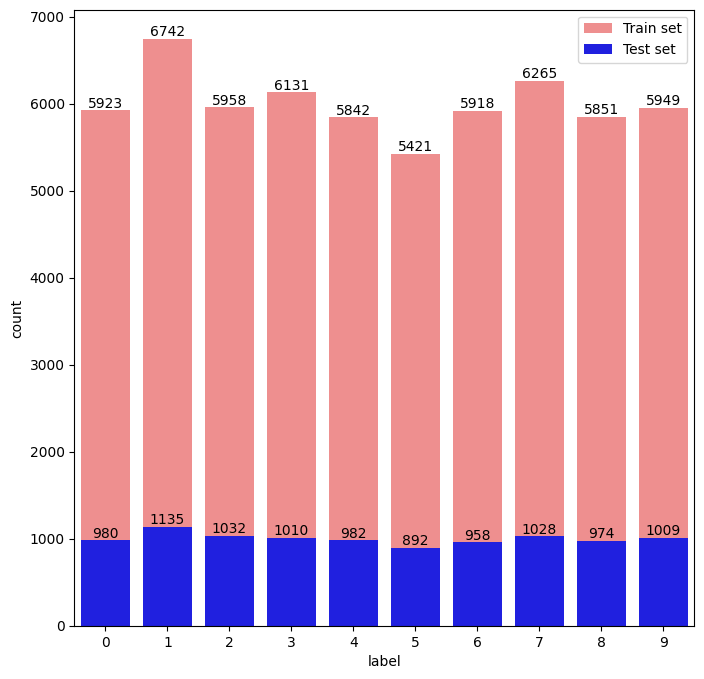

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(df_train, color='r', label='Train set', x="label", alpha=0.5)
sns.countplot(df_test, color='b', label='Test set', x="label")
ax.set_xticks(range(10), labels=map(str, range(10)))

plt.legend()
for i in ax.containers:
    ax.bar_label(i,)

In [69]:
# Calculate the mean of the digits

digits_mean = [
    [
        np.matrix(np.reshape(row['image'], (28, 28))).mean()
        for index, row in df_train_images.loc[df_train_images['label'] == i].iterrows()]
        for i in range(10)]

df_digits_means = pd.DataFrame({
    "label": range(10),
    "mean": digits_mean
})


TypeError: unsupported operand type(s) for -: 'list' and 'list'

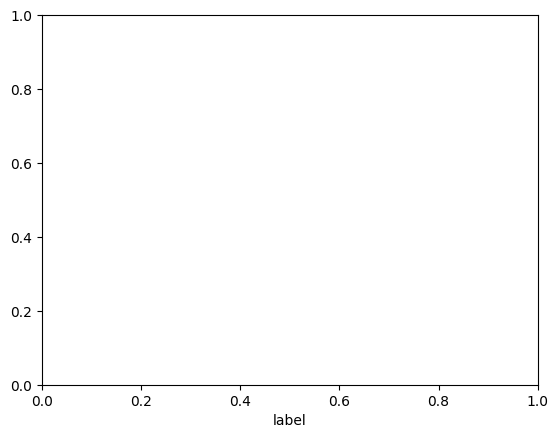

In [74]:
df_digits_means.corr()